In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation Libraries
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.datasets import mnist




orig=mnist
# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
#✅ Why Set a Random Seed?
#Ensures Consistent Results – Running the same code multiple times will produce the same output.

#Helps Debugging – Makes it easier to trace issues when results are consistent.

#Standard Practice in ML/DL – Especially when using random initializations (e.g., weight initialization in neural networks).

In [2]:
#Digit MNIST dataset

In [3]:
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [4]:
#Images (X) are 28x28 grayscale pixels.
#Labels (y) are the digit class (0-9).
#There are 60,000 training images and 10,000 test images.

In [5]:
 y_test_digit[3]
#You are accessing the 4th label

0

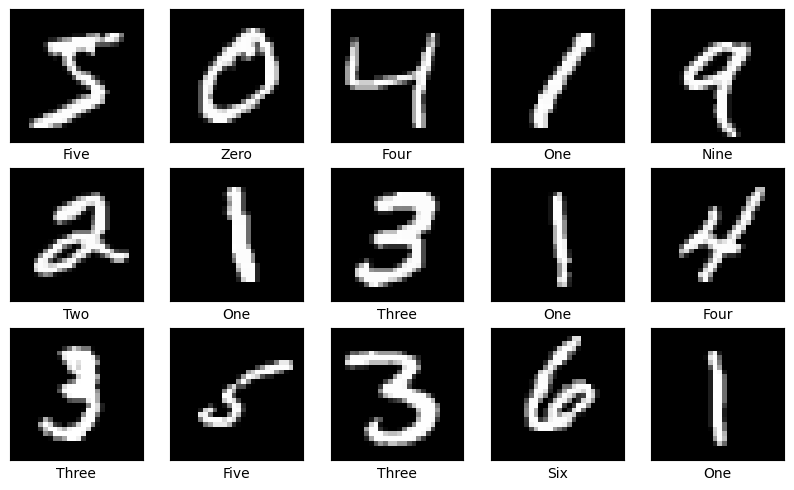

In [6]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
#Creates a square figure that is 10 inches wide and 10 inches tall.
#10 inches wide and 10 inches tall
#Loops through the first 15 images in the training dataset (X_train_digit).
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

# Preprocessing the input-Converting 3d to 2d

In [7]:
print(X_train_digit.shape)  
print(y_train_digit.shape)  
print(X_test_digit.shape)  
print(y_test_digit.shape)   

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)  

In [10]:
print(X_train_digit.shape)  
print(y_train_digit.shape)  
print(X_test_digit.shape)  
print(y_test_digit.shape)   

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [11]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [13]:
#MNIST dataset into one-hot encoded format using to_categorical

In [14]:
y_train_digit[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [15]:
import sklearn
print(sklearn.__version__)


1.5.1


In [16]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

In [19]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [20]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4902 - loss: 3.6330 - val_accuracy: 0.6803 - val_loss: 0.3426
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6888 - loss: 0.2741 - val_accuracy: 0.7616 - val_loss: 0.2347
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7511 - loss: 0.1639 - val_accuracy: 0.7452 - val_loss: 0.2006
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7324 - loss: 0.1354 - val_accuracy: 0.7785 - val_loss: 0.1746
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7300 - loss: 0.1046 - val_accuracy: 0.7241 - val_loss: 0.1922
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7007 - loss: 0.1015 - val_accuracy: 0.7461 - val_loss: 0.1992
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7107 - loss: 0.1025 - val_accuracy: 0.7491 - val_loss: 0.1725
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6931 - loss: 0.0893 - val_accuracy: 0.

In [21]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6868 - loss: 0.1739


In [22]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.683


In [23]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [24]:
y_predict[0]

array([1.6198739e-07, 8.2216042e-01, 2.0216651e-01, 6.1204338e-01,
       1.4264905e-01, 2.9379660e-03, 9.2461458e-05, 1.0000000e+00,
       8.0444012e-03, 3.8325003e-01], dtype=float32)

In [25]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [26]:
y_predicts[0]

7

In [27]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
y_pre=pd.DataFrame(y_predicts)

In [29]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,1
9996,3
9997,4
9998,5


In [30]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

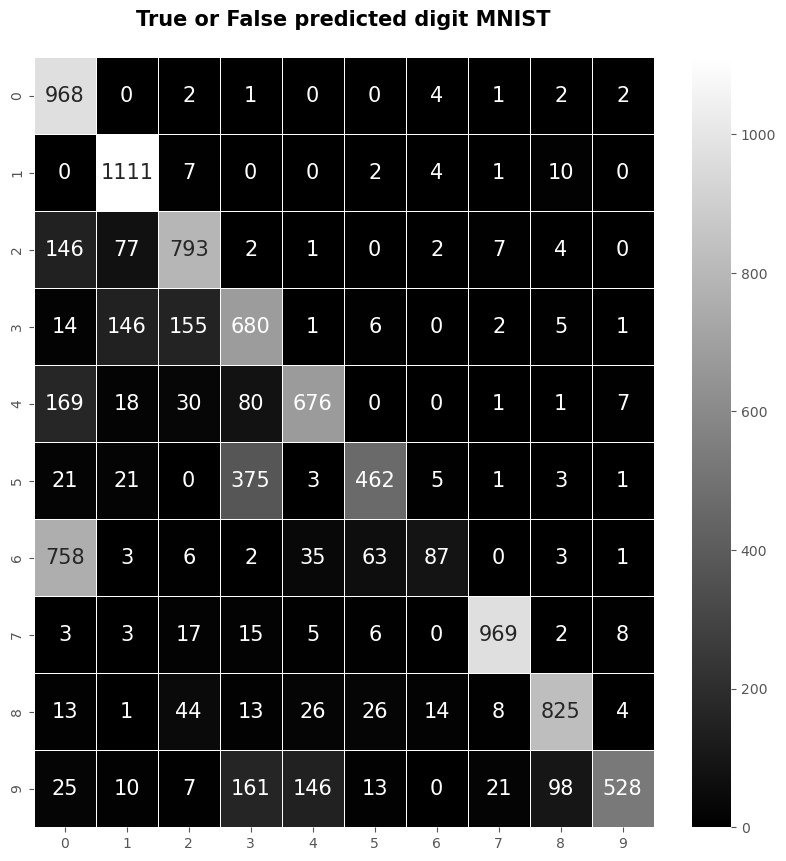

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for Digit MNIST
con_mat = confusion_matrix(y_test_digit_eval, y_predicts)

# Use a valid Matplotlib style
plt.style.use('ggplot')  # Change this to a valid style

# Alternative: Use seaborn's style
# sns.set_style("darkgrid")  

plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title('True or False predicted digit MNIST\n', fontweight='bold', fontsize=15)
plt.show()


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.46      0.99      0.63       980
           1       0.80      0.98      0.88      1135
           2       0.75      0.77      0.76      1032
           3       0.51      0.67      0.58      1010
           4       0.76      0.69      0.72       982
           5       0.80      0.52      0.63       892
           6       0.75      0.09      0.16       958
           7       0.96      0.94      0.95      1028
           8       0.87      0.85      0.86       974
           9       0.96      0.52      0.68      1009

    accuracy                           0.71     10000
   macro avg       0.76      0.70      0.68     10000
weighted avg       0.76      0.71      0.69     10000



In [33]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


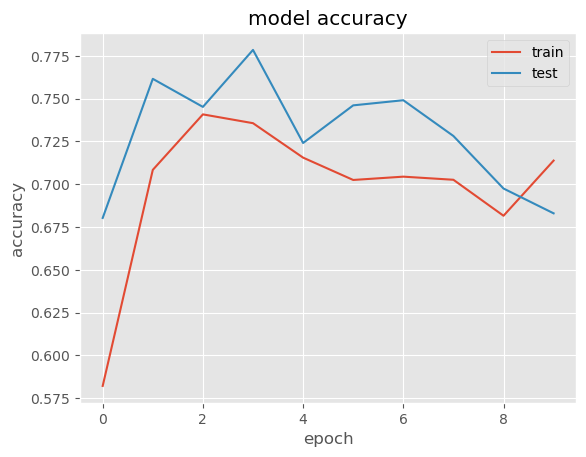

In [34]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


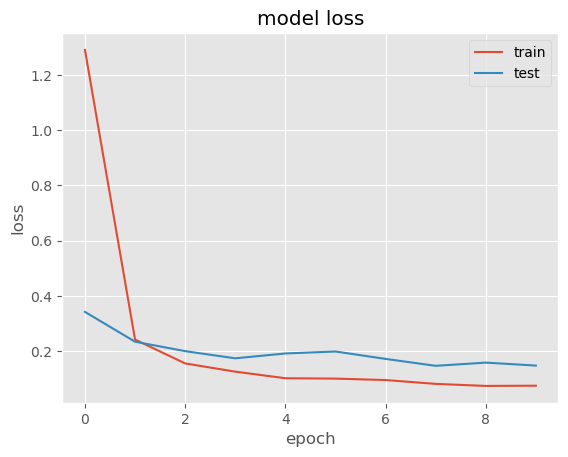

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [36]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [37]:
y_predicts_single[0]

1

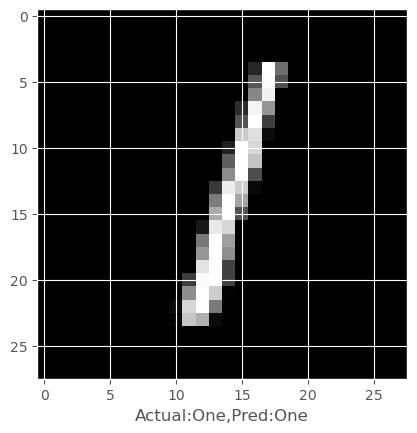

In [38]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [39]:
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])